In [6]:
import pandas as pd

file_paths = {
    "2015": "2015.csv",
    "2016": "2016.csv",
    "2017": "2017.csv",
    "2018": "2018.csv",
    "2019": "2019.csv",
    "2020": "2020.csv",
    "2021": "2021.csv",
    "2022": "2022.csv",
    "2023": "2023.csv"
}

dataframes = {}
for year, path in file_paths.items():
    df = pd.read_csv(path)
    if year == "2022":
        df.rename(columns={
            "RANK": "Rank",
            "Country": "Country",
            "Happiness score": "Score",
            "Explained by: GDP per capita": "GDP",
            "Explained by: Social support": "Family",
            "Explained by: Healthy life expectancy": "Health",
            "Explained by: Freedom to make life choices": "Freedom",
            "Explained by: Generosity": "Generosity",
            "Explained by: Perceptions of corruption": "Trust"
        }, inplace=True)
        df["Year"] = int(year)
        
        df = df[["Country", "Rank", "Score", "GDP", "Family", "Health",
                 "Freedom", "Generosity", "Trust", "Year"]]
    else:
        df.rename(columns={
            "Country": "Country",
            "Country or region": "Country",
            "Country name": "Country",
            "Happiness Rank": "Rank",
            "Happiness.Rank": "Rank",
            "Overall rank": "Rank",
            "Happiness Score": "Score",
            "Happiness.Score": "Score",
            "Score": "Score",
            "Ladder score": "Score",
            "Economy (GDP per Capita)": "GDP",
            "Economy..GDP.per.Capita.": "GDP",
            "GDP per capita": "GDP",
            "Logged GDP per capita": "GDP",
            "Family": "Family",
            "Social support": "Family",
            "Health (Life Expectancy)": "Health",
            "Health..Life.Expectancy.": "Health",
            "Healthy life expectancy": "Health",
            "Freedom": "Freedom",
            "Freedom to make life choices": "Freedom",
            "Trust (Government Corruption)": "Trust",
            "Trust..Government.Corruption.": "Trust",
            "Perceptions of corruption": "Trust",
            "Generosity": "Generosity",
            "Dystopia Residual": "Dystopia"
        }, inplace=True)
        df["Year"] = int(year)
        df.reset_index(inplace=True)
        df["Rank"] = df.index + 1 
        df = df[["Country", "Rank", "Score", "GDP", "Family", "Health",
                 "Freedom", "Generosity", "Trust", "Year"]]
    
    dataframes[year] = df

combined_df = pd.concat(dataframes.values(), ignore_index=True)

kazakhstan_data = combined_df[combined_df["Country"] == "Kazakhstan"].copy()

print(kazakhstan_data)


         Country  Rank   Score        GDP    Family     Health   Freedom  \
53    Kazakhstan    54  5.8550   1.122540  1.122410   0.643680  0.516490   
211   Kazakhstan    54  5.9190   1.229430  0.955440   0.573860  0.405200   
374   Kazakhstan    60  5.8190   1.284556  1.384369   0.606042  0.437454   
529   Kazakhstan    60  5.7900   1.143000  1.516000   0.631000  0.454000   
685   Kazakhstan    60  5.8090   1.173000  1.508000   0.729000  0.410000   
831   Kazakhstan    50  6.0579  10.114658  0.934745  64.609962  0.811602   
979   Kazakhstan    45  6.1520  10.155000  0.952000  65.200000  0.853000   
1123  Kazakhstan    40  6.2340   1.668000  1.220000   0.611000  0.584000   
1273  Kazakhstan    44  6.1440  10.166000  0.931000  65.802000  0.853000   

      Generosity     Trust  Year  
53      0.118270  0.084540  2015  
211     0.150110  0.111320  2016  
374     0.201964  0.119283  2017  
529     0.148000  0.121000  2018  
685     0.146000  0.096000  2019  
831    -0.068489  0.764491  2

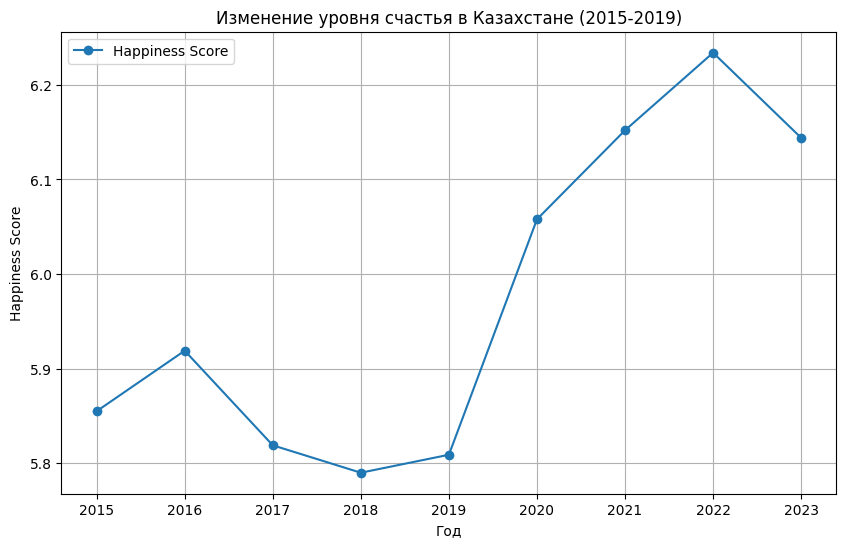

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(kazakhstan_data["Year"], kazakhstan_data["Score"], marker='o', linestyle='-', label='Happiness Score')
plt.title("Изменение уровня счастья в Казахстане (2015-2019)")
plt.xlabel("Год")
plt.ylabel("Happiness Score")
plt.grid()
plt.legend()
plt.show()


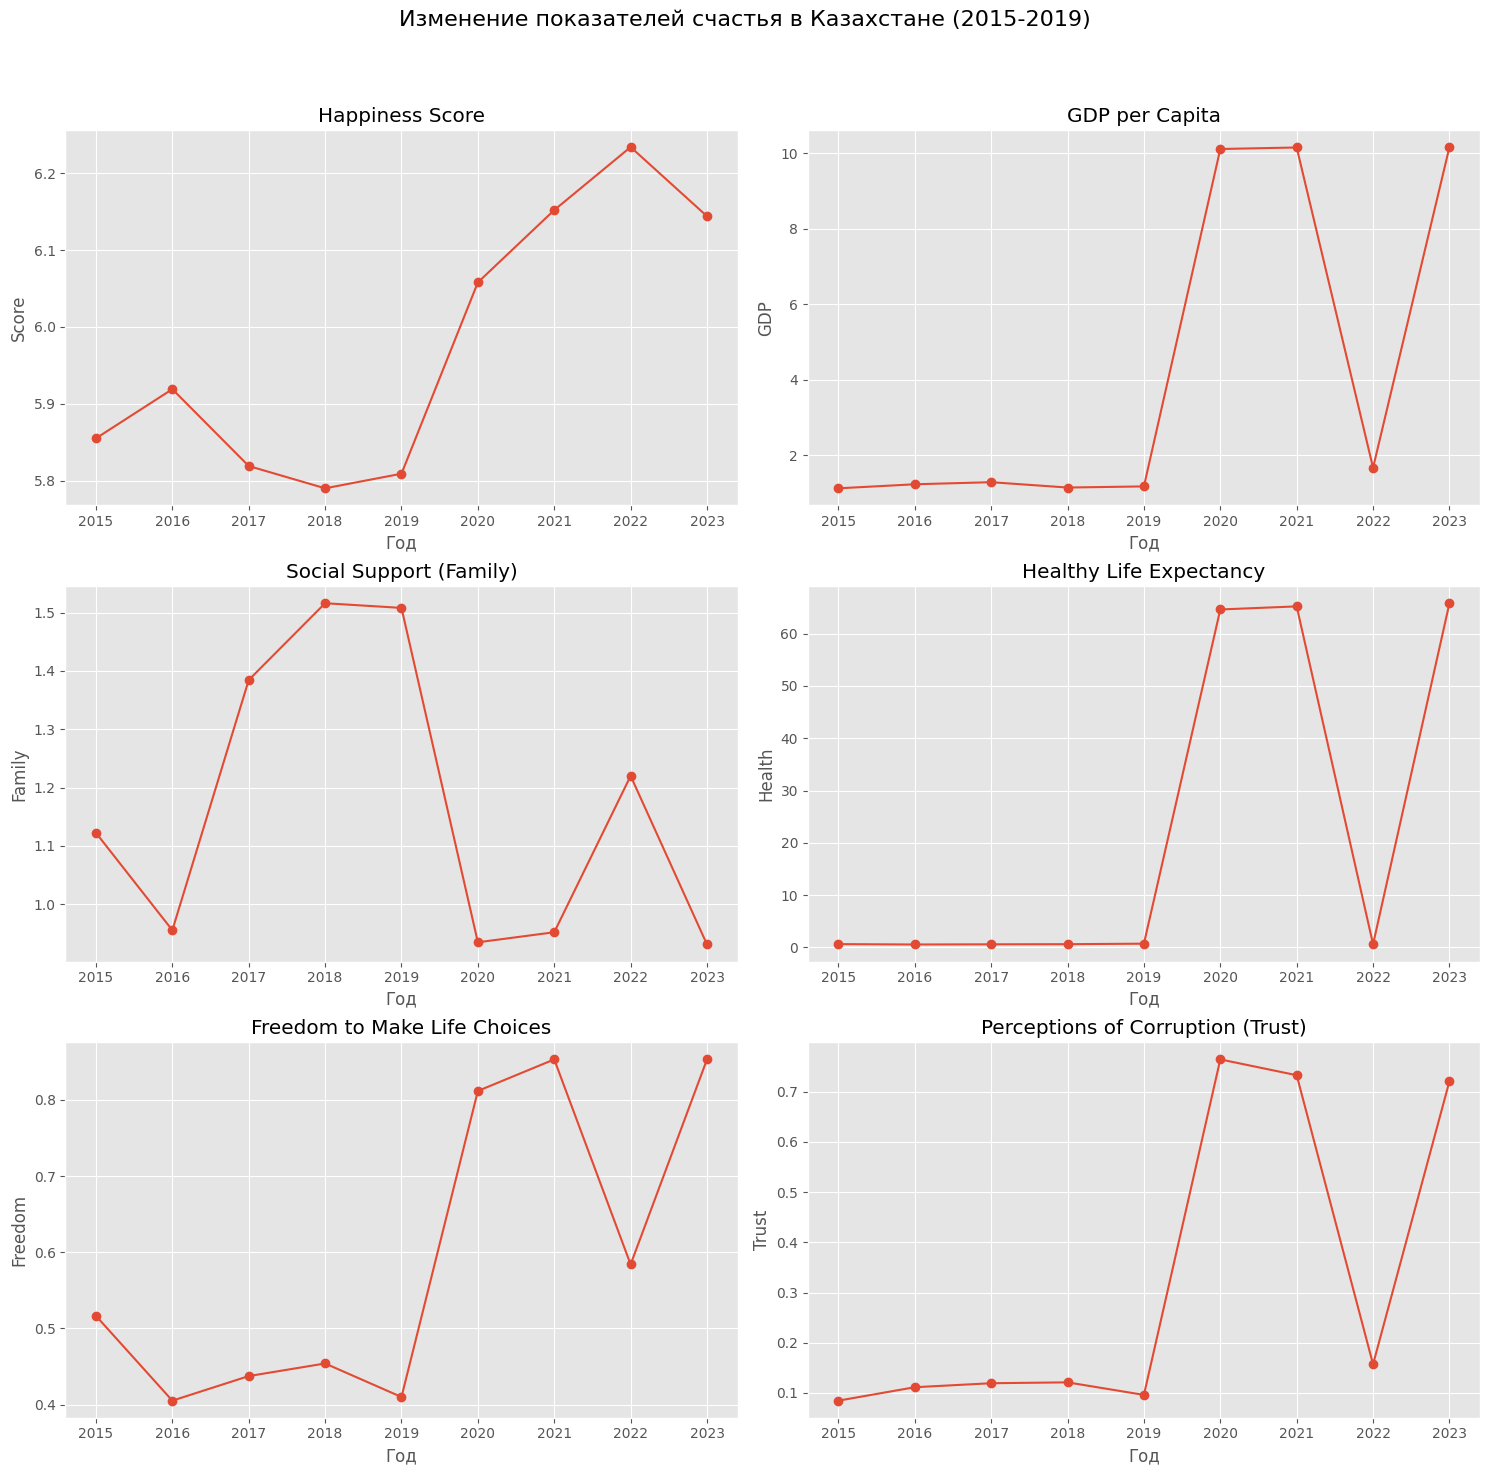

In [8]:
import matplotlib.pyplot as plt

kazakhstan_data = combined_df[combined_df["Country"] == "Kazakhstan"]

plt.style.use('ggplot')

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Изменение показателей счастья в Казахстане (2015-2019)", fontsize=16)

axes[0, 0].plot(kazakhstan_data["Year"], kazakhstan_data["Score"], marker='o')
axes[0, 0].set_title("Happiness Score")
axes[0, 0].set_xlabel("Год")
axes[0, 0].set_ylabel("Score")

axes[0, 1].plot(kazakhstan_data["Year"], kazakhstan_data["GDP"], marker='o')
axes[0, 1].set_title("GDP per Capita")
axes[0, 1].set_xlabel("Год")
axes[0, 1].set_ylabel("GDP")

axes[1, 0].plot(kazakhstan_data["Year"], kazakhstan_data["Family"], marker='o')
axes[1, 0].set_title("Social Support (Family)")
axes[1, 0].set_xlabel("Год")
axes[1, 0].set_ylabel("Family")

axes[1, 1].plot(kazakhstan_data["Year"], kazakhstan_data["Health"], marker='o')
axes[1, 1].set_title("Healthy Life Expectancy")
axes[1, 1].set_xlabel("Год")
axes[1, 1].set_ylabel("Health")

axes[2, 0].plot(kazakhstan_data["Year"], kazakhstan_data["Freedom"], marker='o')
axes[2, 0].set_title("Freedom to Make Life Choices")
axes[2, 0].set_xlabel("Год")
axes[2, 0].set_ylabel("Freedom")

axes[2, 1].plot(kazakhstan_data["Year"], kazakhstan_data["Trust"], marker='o')
axes[2, 1].set_title("Perceptions of Corruption (Trust)")
axes[2, 1].set_xlabel("Год")
axes[2, 1].set_ylabel("Trust")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [9]:
missing_values = combined_df.isnull().sum()
data_types = combined_df.dtypes

summary_stats = combined_df.describe()

print("Пропуски в данных:", missing_values)
print("Типы данных:", data_types)
print("Статистика данных:", summary_stats)


Пропуски в данных:
 Country       0
Rank          0
Score         0
GDP           0
Family        0
Health        1
Freedom       0
Generosity    0
Trust         1
Year          0
dtype: int64

Типы данных:
 Country        object
Rank            int64
Score         float64
GDP           float64
Family        float64
Health        float64
Freedom       float64
Generosity    float64
Trust         float64
Year            int64
dtype: object

Статистика данных:
               Rank        Score          GDP       Family       Health  \
count  1367.000000  1367.000000  1367.000000  1367.000000  1366.000000   
mean     76.580834     5.441086     3.690225     0.973053    21.189005   
std      44.088830     1.117909     3.996117     0.301305    30.197855   
min       1.000000     1.859000     0.000000     0.000000     0.000000   
25%      38.500000     4.599500     0.877137     0.789840     0.571697   
50%      76.000000     5.440000     1.299470     0.929000     0.785500   
75%     114.000000 

In [10]:
combined_df["Trust"] = combined_df["Trust"].fillna(combined_df["Trust"].median())

In [11]:
zero_values = (combined_df == 0).sum()
print("Нулевые значения:", zero_values)

Нулевые значения:
 Country       0
Rank          0
Score         0
GDP           6
Family        6
Health        6
Freedom       6
Generosity    7
Trust         7
Year          0
dtype: int64


In [12]:
columns_with_zeros = ["GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]
for col in columns_with_zeros:
    median_value = combined_df[col].median()
    combined_df[col] = combined_df[col].replace(0, median_value)


In [13]:
missing_values_after = combined_df.isnull().sum()
zero_values_after = (combined_df == 0).sum()

print("Пропуски после очистки:", missing_values_after)
print("\nНули после очистки:", zero_values_after)

Пропуски после очистки:
 Country       0
Rank          0
Score         0
GDP           0
Family        0
Health        1
Freedom       0
Generosity    0
Trust         0
Year          0
dtype: int64

Нули после очистки:
 Country       0
Rank          0
Score         0
GDP           0
Family        0
Health        0
Freedom       0
Generosity    0
Trust         0
Year          0
dtype: int64


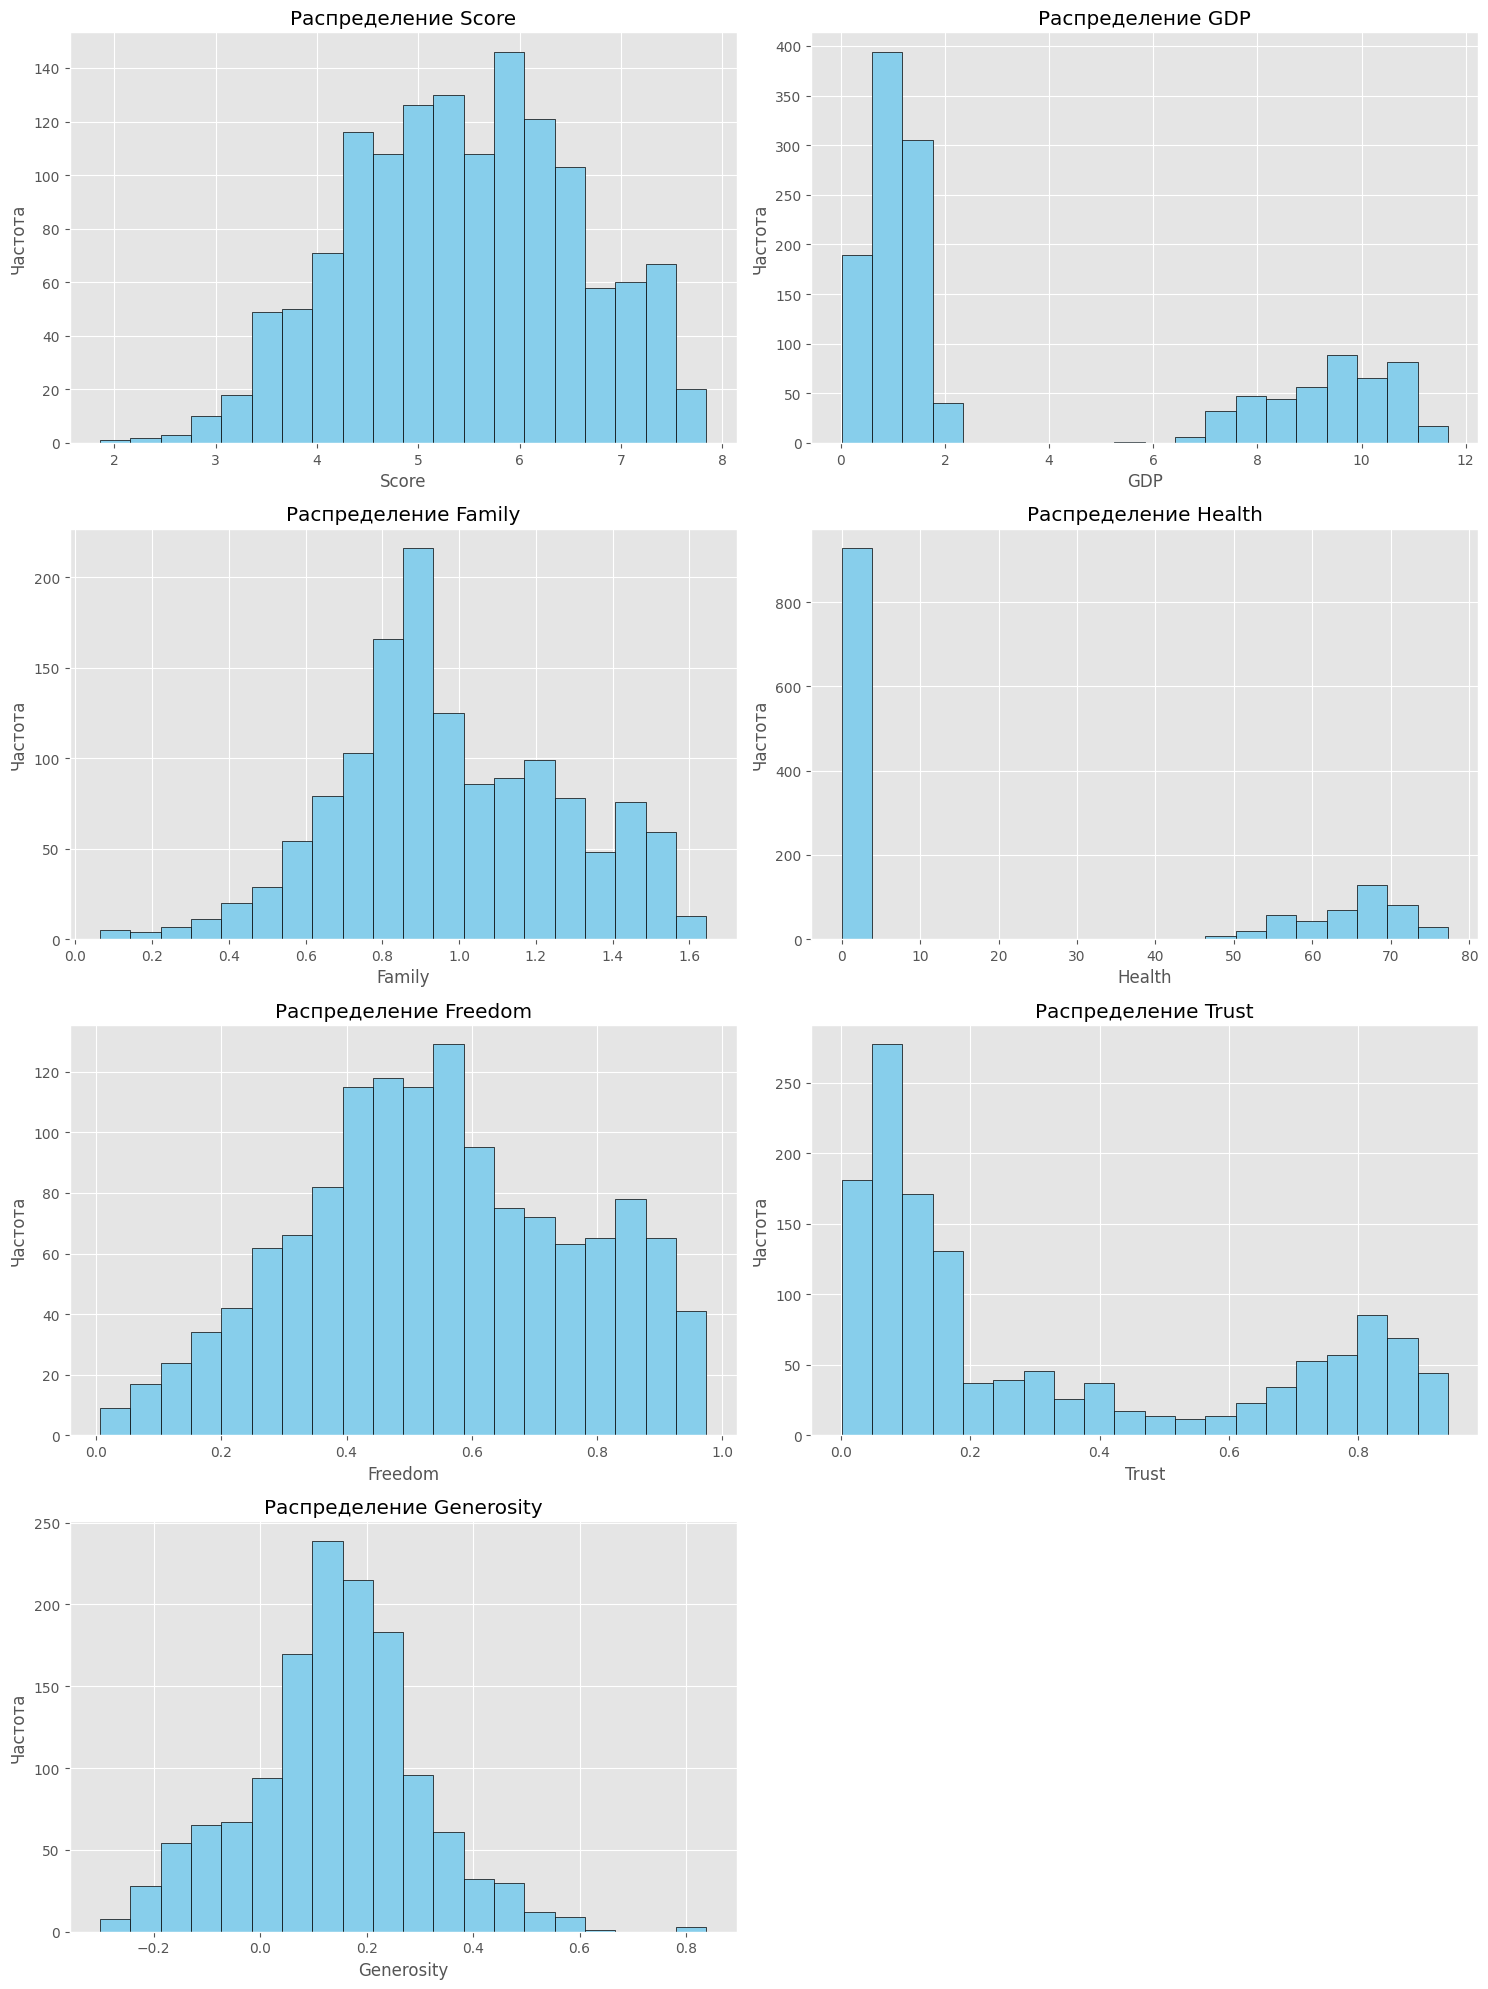

In [14]:
import matplotlib.pyplot as plt

columns_to_plot = ["Score", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]

plt.figure(figsize=(15, 20))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    plt.hist(combined_df[col], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Распределение {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()


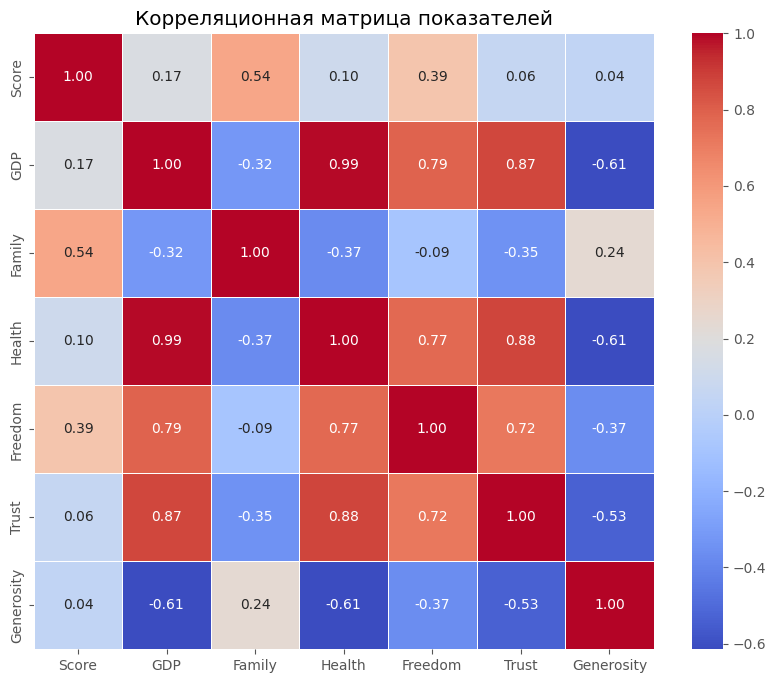

In [15]:
import seaborn as sns

correlation_matrix = combined_df[["Score", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица показателей")
plt.show()


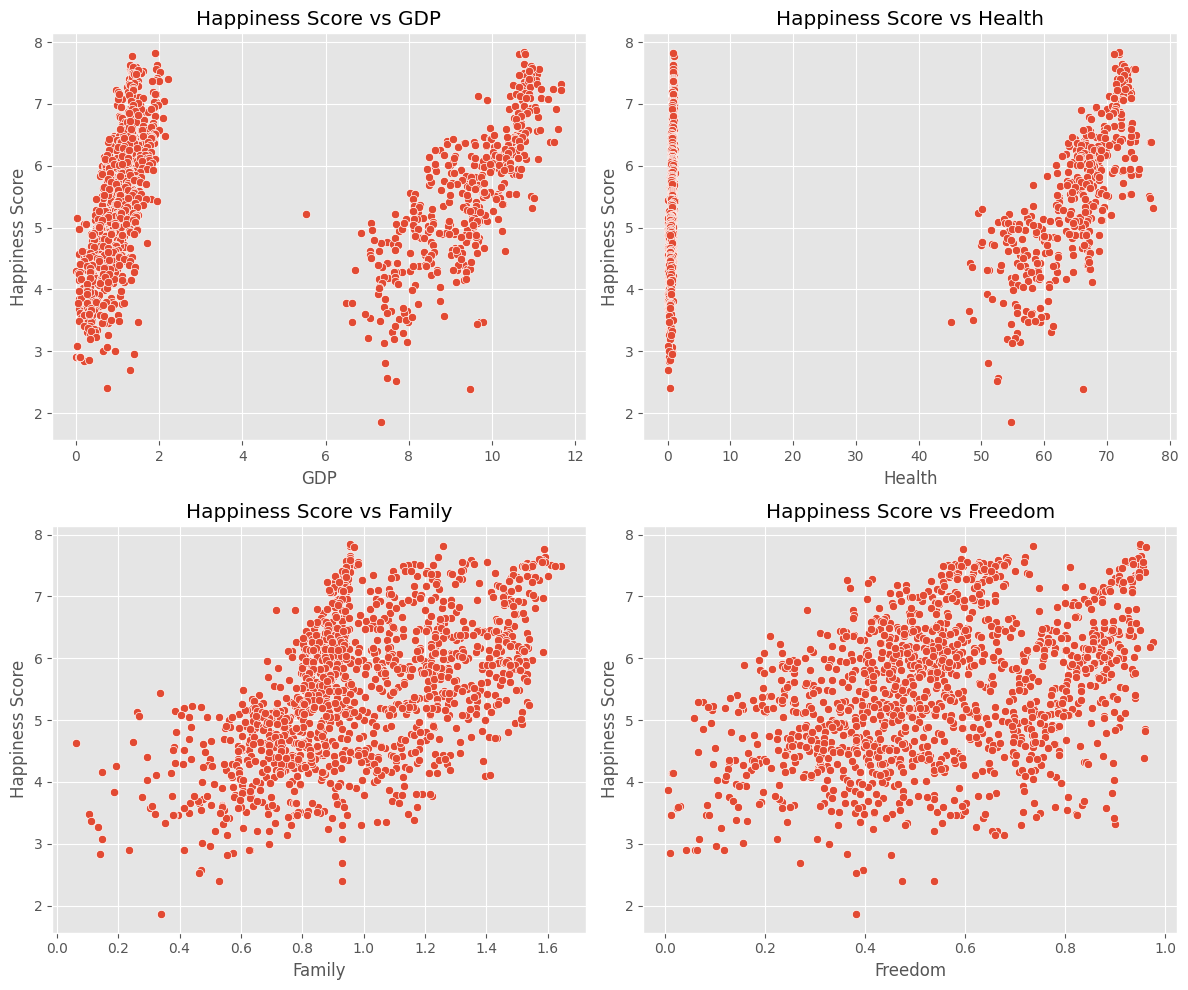

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

key_factors = ["GDP", "Health", "Family", "Freedom"]

plt.figure(figsize=(12, 10))
for i, factor in enumerate(key_factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=combined_df[factor], y=combined_df["Score"])
    plt.title(f"Happiness Score vs {factor}")
    plt.xlabel(factor)
    plt.ylabel("Happiness Score")

plt.tight_layout()
plt.show()


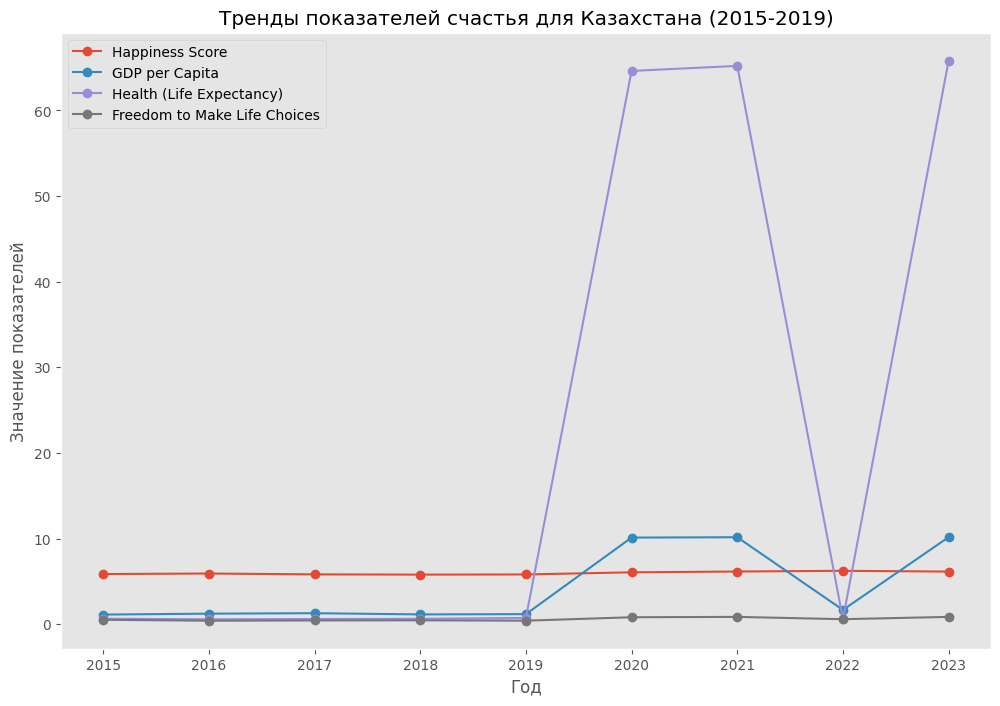

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Score"], marker='o', label="Happiness Score")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["GDP"], marker='o', label="GDP per Capita")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Health"], marker='o', label="Health (Life Expectancy)")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Freedom"], marker='o', label="Freedom to Make Life Choices")

plt.title("Тренды показателей счастья для Казахстана (2015-2019)")
plt.xlabel("Год")
plt.ylabel("Значение показателей")
plt.legend()
plt.grid()
plt.show()


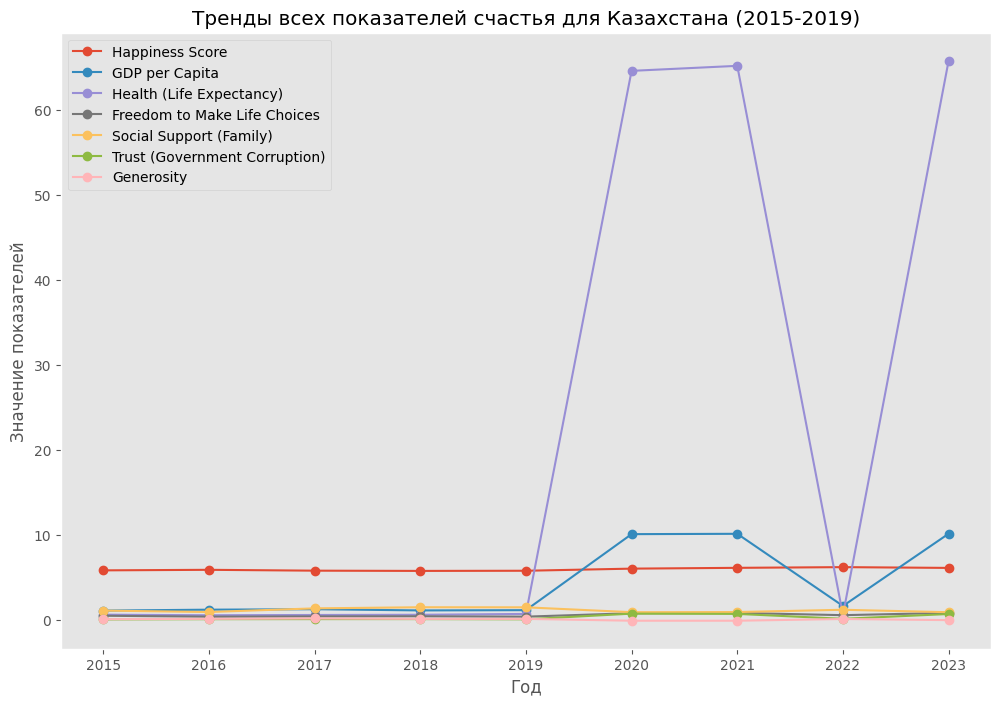

In [18]:
plt.figure(figsize=(12, 8))

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Score"], marker='o', label="Happiness Score")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["GDP"], marker='o', label="GDP per Capita")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Health"], marker='o', label="Health (Life Expectancy)")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Freedom"], marker='o', label="Freedom to Make Life Choices")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Family"], marker='o', label="Social Support (Family)")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Trust"], marker='o', label="Trust (Government Corruption)")

plt.plot(kazakhstan_data["Year"], kazakhstan_data["Generosity"], marker='o', label="Generosity")

plt.title("Тренды всех показателей счастья для Казахстана (2015-2019)")
plt.xlabel("Год")
plt.ylabel("Значение показателей")
plt.legend()
plt.grid()
plt.show()


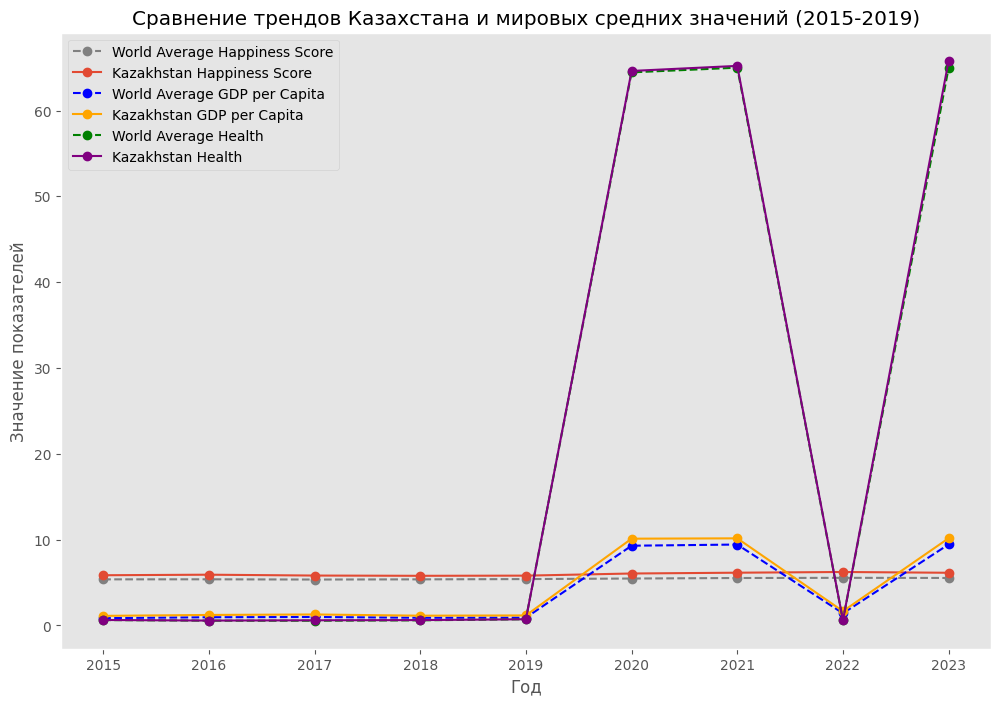

In [19]:
world_avg = combined_df.groupby("Year")[["Score", "GDP", "Health", "Family", "Freedom", "Trust", "Generosity"]].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(world_avg["Year"], world_avg["Score"], marker='o', linestyle='--', label="World Average Happiness Score", color="gray")
plt.plot(kazakhstan_data["Year"], kazakhstan_data["Score"], marker='o', label="Kazakhstan Happiness Score")

plt.plot(world_avg["Year"], world_avg["GDP"], marker='o', linestyle='--', label="World Average GDP per Capita", color="blue")
plt.plot(kazakhstan_data["Year"], kazakhstan_data["GDP"], marker='o', label="Kazakhstan GDP per Capita", color="orange")

plt.plot(world_avg["Year"], world_avg["Health"], marker='o', linestyle='--', label="World Average Health", color="green")
plt.plot(kazakhstan_data["Year"], kazakhstan_data["Health"], marker='o', label="Kazakhstan Health", color="purple")

plt.title("Сравнение трендов Казахстана и мировых средних значений (2015-2019)")
plt.xlabel("Год")
plt.ylabel("Значение показателей")
plt.legend()
plt.grid()
plt.show()


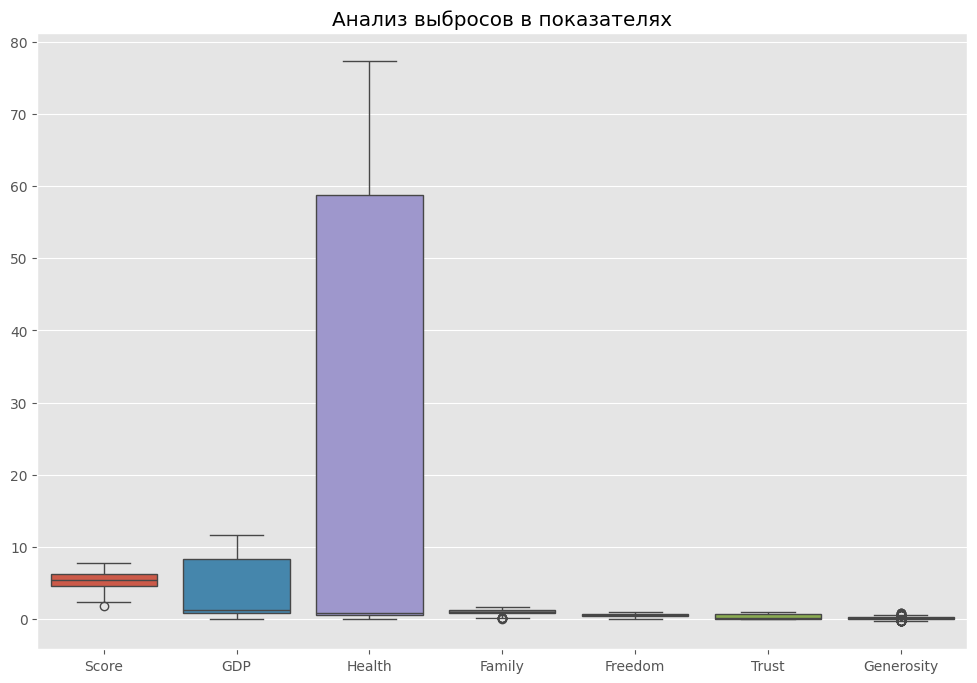

In [20]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df[["Score", "GDP", "Health", "Family", "Freedom", "Trust", "Generosity"]])
plt.title("Анализ выбросов в показателях")
plt.show()
